# ML models

### ML model with rescaled features

In [1]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('100_hit_100_non_hit_songs.csv')

In [3]:
# Starting with the ML model, just with two values at the beginning

X = df[['danceability', 'energy']].values
y = df['success']

In [4]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')

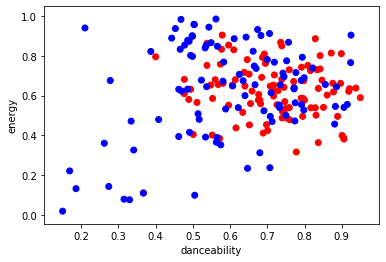

In [5]:
plt.scatter(df['danceability'], df['energy'],c=df['success'],cmap='bwr');
plt.xlabel('danceability');
plt.ylabel('energy');

## Logistic Regression

In [6]:
# Use 'n_jobs = -1' as a parameter in sklearn to use all the computer's cores available

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(n_jobs = -1)

In [9]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [11]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.6

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=5,scoring="accuracy", n_jobs=-1).mean()

0.645

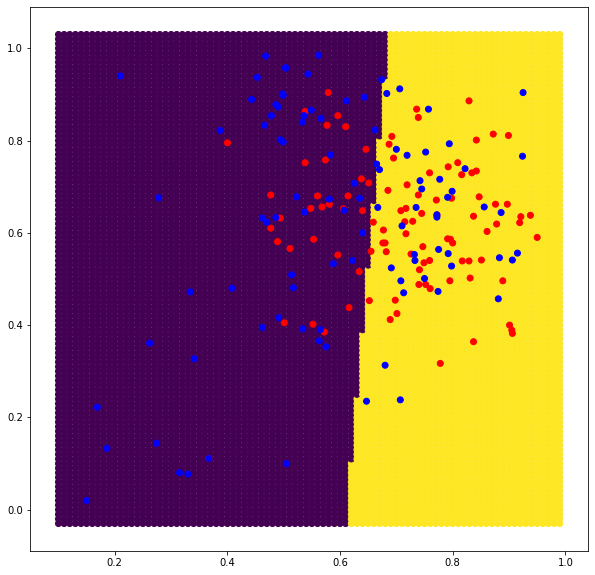

In [14]:
draw(clf,X,y,h=0.01)

## K nearest neighbors Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)

In [16]:
cross_val_score(clf,X,y,scoring="accuracy").mean()

0.6050000000000001

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [18]:
reg = GridSearchCV(KNeighborsClassifier(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring="accuracy",
                  n_jobs=-1)

In [19]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy',

In [20]:
reg.best_score_

0.655

In [21]:
reg.best_params_

{'n_neighbors': 27}

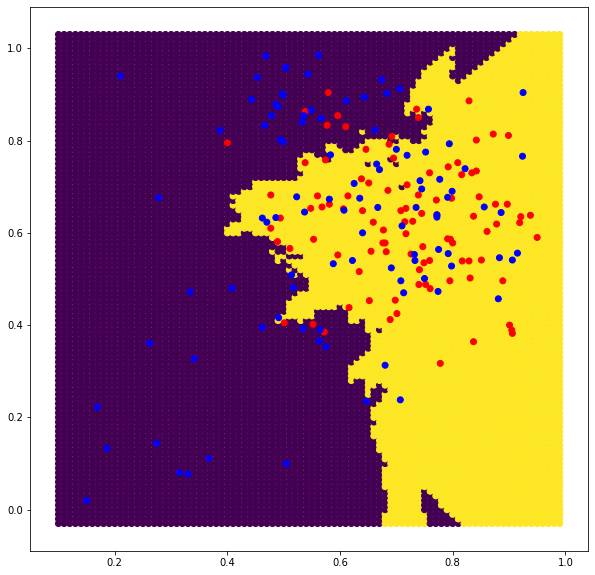

In [22]:
draw(reg.best_estimator_,X,y,0.01)

In [23]:
clfk = reg.best_estimator_

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
import seaborn as sns

In [26]:
confusion_matrix(y_test,clfk.predict(X_test))

array([[5, 5],
       [2, 8]])

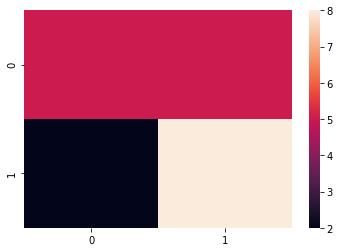

In [27]:
sns.heatmap(confusion_matrix(y_test,clfk.predict(X_test)))

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,clfk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        10
         1.0       0.62      0.80      0.70        10

    accuracy                           0.65        20
   macro avg       0.66      0.65      0.64        20
weighted avg       0.66      0.65      0.64        20



## Support Vector Classifier

In [30]:
from sklearn.svm import SVC

In [31]:
clf = SVC(kernel="linear",C=10)

In [32]:
SVC?

In [33]:
cross_val_score(clf,X,y,cv=3,n_jobs=-1).mean()

0.6399065279662294

In [34]:
clf = GridSearchCV(SVC(kernel="poly",),
                  param_grid={"C":[1,10,100,1000,10000], "degree":[2,3,4,5]},
                  cv=3,
                  scoring="accuracy",
                  n_jobs=-1)

In [35]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'degree': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
clf.best_score_

0.68475802804161

In [37]:
clf.best_params_

{'C': 1000, 'degree': 3}

## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
DecisionTreeClassifier?

In [40]:
clft = DecisionTreeClassifier(max_depth=10)

In [41]:
clft.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
clft.fit?

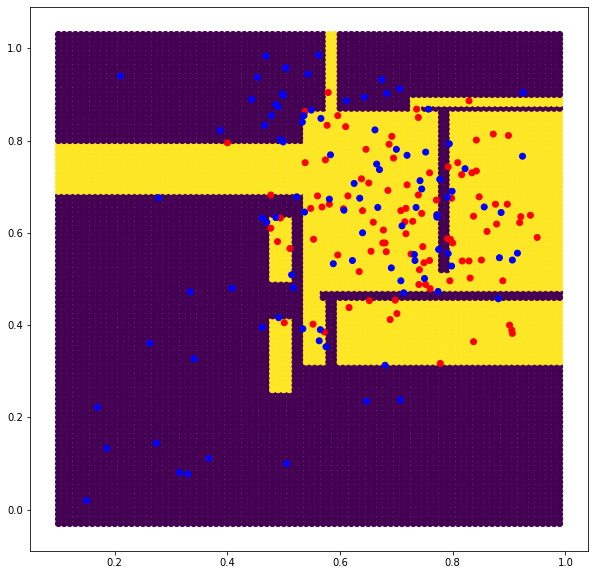

In [43]:
draw(clft,X,y,0.01)

### Now more realistic, using GridSearchCV

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = GridSearchCV(DecisionTreeClassifier(),
                  param_grid={"max_depth":np.arange(2,20), 
                              "min_samples_leaf":np.arange(20,100,20)},
                  cv=3,
                  scoring="accuracy",
                  n_jobs=-1)

In [46]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10,

In [47]:
clf.best_score_

0.6497060153776572

In [48]:
clf.best_params_

{'max_depth': 2, 'min_samples_leaf': 20}

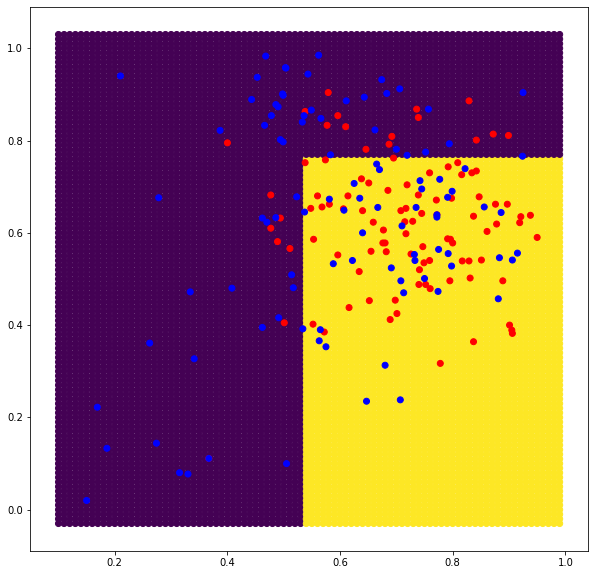

In [49]:
draw(clf.best_estimator_,X,y,0.01)

In [50]:
pred=clf.best_estimator_.predict_proba(X_test)

In [51]:
pred

array([[0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [0.76      , 0.24      ],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [0.76      , 0.24      ],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [0.76      , 0.24      ],
       [0.91304348, 0.08695652],
       [0.91304348, 0.08695652],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [0.35      , 0.65      ],
       [0.5625    , 0.4375    ],
       [0.5625    , 0.4375    ],
       [0.91304348, 0.08695652],
       [0.35      , 0.65      ]])

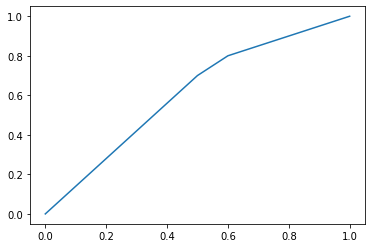

In [52]:
# Load the library
from sklearn.metrics import roc_curve,auc
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,pred[:,target_pos])
plt.plot(fp,tp);

In [53]:
auc(fp, tp)

0.61

### Saving the model

In [54]:
import pickle

In [55]:
pickle.dump(clf ,open("model.pkl","wb"))

### Loading the model

In [56]:
clf_loaded = pickle.load(open("model.pkl","rb"))
clf_loaded

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10,

### Tips for Finalizing Your Model

This section lists some important considerations when finalizing your machine learning models.

### Python Version
Take note of the python version. You almost certainly require the same major (and maybe minor) version of Python used to serialize the model when you later load it and deserialize it.
#### Library Versions
The version of all major libraries used in your machine learning project almost certainly need to be the same when deserializing a saved model. This is not limited to the version of NumPy and the version of scikit-learn.
#### Manual Serialization
You might like to manually output the parameters of your learned model so that you can use them directly in scikit-learn or another platform in the future. Often the algorithms used by machine learning algorithms to make predictions are a lot simpler than those used to learn the parameters can may be easy to implement in custom code that you have control over.

Take note of the version so that you can re-create the environment if for some reason you cannot reload your model on another machine or another platform at a later time.